# Data Cleaning And Visualisation Task

## Loading in the data:
We know that the json data provided to us is in the form:
 
`{data: [{}, {}, {}, …, {}]}`

So the first thing to do is to load the data in. This will be done using the `json` module in python

In [1]:
import pandas as pd
import json

fh = open('../data/tasktwo/data.json')
alldata = json.load(fh)
fh.close()
alldata['data'][0]

{'category': 'Sports',
 'event_name': 'View Project',
 'gender': 'M',
 'age': '18-24',
 'marital_status': 'married',
 'session_id': '69f62d2ae87640f5a2dde2b2e9229fe6',
 'device': 'android',
 'client_time': 1393632004,
 'location': {'latitude': 40.189788,
  'city': 'Lyons',
  'state': 'CO',
  'longitude': -105.35528,
  'zip_code': '80540'}}

We can see what the first object in our data looks like above

We have also imported the `pandas` module because we plan to convert the json data into a dataframe to process it further.

In [2]:
df = pd.DataFrame(alldata['data'])
df

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN
...,...,...,...,...,...,...,...,...,...,...
49995,Sports,Fund Project,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,"{'latitude': 45.343615, 'city': 'West Linn', '...",35.0
49996,Technology,View Project,F,45-54,single,4addd36a6f4347c59865fe04a92e8d57,android,1396309769,"{'latitude': 41.079983, 'city': 'Greenwich', '...",NaN
49997,Fashion,View Project,F,25-34,single,3181a138a0b94d1da9a3d29f7816fcc7,iOS,1396309893,"{'latitude': 40.36502, 'city': 'Irwin', 'state...",NaN
49998,Sports,Fund Project,F,35-44,married,2df6b9a0c66b48a389330327517b9276,iOS,1396309968,"{'latitude': 39.477625, 'city': 'Martinsville'...",37.0


## Cleaning the data
The first criteria provided in the problem statement is that the bicycle project belongs to two categories
- Sports
- Environment

So we can safely assume that the analytics data for any other category is redundant for our use case, and hence we can get rid of it.

To do this, we create a boolean mask in pandas and apply it to our dataframe `df`

In [3]:
mask = (df['category'] == "Sports")|(df['category'] == "Environment")
df = df[mask]
df

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN
12,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",NaN
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0
...,...,...,...,...,...,...,...,...,...,...
49984,Environment,Fund Project,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,"{'latitude': 33.760505, 'city': 'Atlanta', 'st...",23.0
49989,Sports,Fund Project,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,"{'latitude': 39.872535, 'city': 'Westminster',...",37.0
49994,Environment,Fund Project,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,1396309700,"{'latitude': 27.457947, 'city': 'Sebring', 'st...",35.0
49995,Sports,Fund Project,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,"{'latitude': 45.343615, 'city': 'West Linn', '...",35.0


We can see now that we have successfully narrowed down our dataframe to 20079 rows from 50000 rows!

Our next step is going to be to try and drop the `event_name` column.

In [4]:
masktemp = df['amount'] == 0
masktemp.sum() #Sum of bool mask is num of trues in the mask

0

As we can see there are no people who have funded a project with amount = 0.

So we can treat the people who have only viewed the project as people who have funded the project with amount = 0, and drop the `event_name` column altogether.

In [5]:
df['amount'] = df['amount'].fillna(0)
df = df.drop(columns=['event_name'])
df

,category,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",0.0
2,Environment,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",0.0
4,Sports,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",0.0
12,Sports,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",0.0
16,Sports,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0
...,...,...,...,...,...,...,...,...,...
49984,Environment,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,"{'latitude': 33.760505, 'city': 'Atlanta', 'st...",23.0
49989,Sports,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,"{'latitude': 39.872535, 'city': 'Westminster',...",37.0
49994,Environment,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,1396309700,"{'latitude': 27.457947, 'city': 'Sebring', 'st...",35.0
49995,Sports,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,"{'latitude': 45.343615, 'city': 'West Linn', '...",35.0


We can also consider dropping the `category` column as well, since both categories are of equal interest to us.

In [6]:
df = df.drop(columns=['category'])
df

,gender,age,marital_status,session_id,device,client_time,location,amount
0,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",0.0
2,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",0.0
4,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",0.0
12,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",0.0
16,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0
...,...,...,...,...,...,...,...,...
49984,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,"{'latitude': 33.760505, 'city': 'Atlanta', 'st...",23.0
49989,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,"{'latitude': 39.872535, 'city': 'Westminster',...",37.0
49994,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,1396309700,"{'latitude': 27.457947, 'city': 'Sebring', 'st...",35.0
49995,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,"{'latitude': 45.343615, 'city': 'West Linn', '...",35.0


Now if we take a closer look, we observe that one user has made multiple entries in the dataframe, and each of these entries is differentiated by its timestamp. This can be easily shown by executing the cell below:

In [7]:
df.duplicated(['session_id']).sum(), df.duplicated(['session_id', 'client_time']).sum()

(12961, 0)

This is probably a good time to unfold our `location` column. We left it as a dictionary uptil now, but we can't group unhashable types of data. So we will open up the `location` dictionary into multiple columns. 

In [8]:
locdf = pd.json_normalize(df['location']) #Faster as compared to df['location'].apply(pd.Series)
locdf

,latitude,city,state,longitude,zip_code
0,40.189788,Lyons,CO,-105.355280,80540
1,42.446396,Westford,MA,-71.459405,01886
2,36.747083,Lampe,MO,-93.458626,65681
3,33.794055,Atlanta,GA,-84.377326,30308
4,40.189788,Lyons,CO,-105.355280,80540
...,...,...,...,...,...
20074,33.760505,Atlanta,GA,-84.399626,30313
20075,39.872535,Westminster,CO,-105.034487,80030
20076,27.457947,Sebring,FL,-81.373012,33870
20077,45.343615,West Linn,OR,-122.664926,97068


In [9]:
locdf = locdf.set_index(df.index)
df = df.join(locdf, on=df.index)
df = df.drop(columns=['location'])
df

,gender,age,marital_status,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code
0,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,0.0,40.189788,Lyons,CO,-105.355280,80540
2,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,0.0,42.446396,Westford,MA,-71.459405,01886
4,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,0.0,36.747083,Lampe,MO,-93.458626,65681
12,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,0.0,33.794055,Atlanta,GA,-84.377326,30308
16,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,31.0,40.189788,Lyons,CO,-105.355280,80540
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,23.0,33.760505,Atlanta,GA,-84.399626,30313
49989,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,37.0,39.872535,Westminster,CO,-105.034487,80030
49994,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,1396309700,35.0,27.457947,Sebring,FL,-81.373012,33870
49995,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,35.0,45.343615,West Linn,OR,-122.664926,97068


We can safely infer that the interest of a user in the categories of our project will be directly related to the number of times the user shows up in this dataset.

We can now introduce an additional column to our dataset which will show us "measure of interest" a particular user has in the the categories of our product. We will call it frequency, and it will represent the number of times a particular entry has been made in our dataset

Initially, the frequency will be set to 1 in each row of our data, because each row represents one viewing or funding done by a user. This will also help us when we group the data (as we shall see)

In [10]:
df['frequency'] = 1
df

,gender,age,marital_status,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code,frequency
0,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,0.0,40.189788,Lyons,CO,-105.355280,80540,1
2,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,0.0,42.446396,Westford,MA,-71.459405,01886,1
4,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,0.0,36.747083,Lampe,MO,-93.458626,65681,1
12,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,0.0,33.794055,Atlanta,GA,-84.377326,30308,1
16,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,31.0,40.189788,Lyons,CO,-105.355280,80540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,23.0,33.760505,Atlanta,GA,-84.399626,30313,1
49989,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,37.0,39.872535,Westminster,CO,-105.034487,80030,1
49994,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,1396309700,35.0,27.457947,Sebring,FL,-81.373012,33870,1
49995,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,35.0,45.343615,West Linn,OR,-122.664926,97068,1


Now we can eliminate further redundancies by grouping all data points (rows) with the same user.

We could not do this before because the number of times a person shows up in our dataset tells us something about his or her interest in projects of this category, but now we are keeping track of the same using the frequency column, so we can get rid of the client_time column and start grouping the data.

Note: We will be taking the sum of the frequencies as well as the amount. Since this way we will keep track of the total amount spent by a user in funding projects similar to ours. 


In [11]:
df = df.drop(columns=['client_time'])

We should first see whether there are any sessions with different data in other column.

In [12]:
temp_df_1 = df.groupby(['session_id', 'age', 'marital_status', 'device', 'gender', 'latitude', 'longitude'], as_index=False)
temp_df_2 = df.groupby(['session_id'], as_index=False)
len(temp_df_1), len(temp_df_2)
#.agg({'frequency': 'sum', 'amount': 'sum', 'city': 'first', 'state': 'first'})

(8276, 7118)

From the above cell, we can conclude that there are around (8276-7118) cells which have the same session_id but at least one different value in some other column.
They could be differing in age or gender etc. So it's best to treat these as different users filling our survey from the same device. For example, a person and his family can use the same desktop to fill out forms.

So we will group by all values that should be same for one user, instead of just the session_id *

In [13]:
df = df.groupby(['session_id', 'age', 'marital_status', 'device', 'gender', 'latitude', 'longitude', 'city', 'state', 'zip_code'], as_index=False).agg({'frequency': 'sum', 'amount': 'sum'})

df

,session_id,age,marital_status,device,gender,latitude,longitude,city,state,zip_code,frequency,amount
0,000716c0e76a41508feb786d202748e7,35-44,single,iOS,M,31.711209,-106.243004,El Paso,TX,79936,3,37.0
1,000716c0e76a41508feb786d202748e7,35-44,single,iOS,U,31.711209,-106.243004,El Paso,TX,79936,1,0.0
2,000e13dfa71146e192060542cda8721d,18-24,single,android,F,33.794055,-84.377326,Atlanta,GA,30308,2,29.0
3,0018be2c216249469b0f04f51ca9bc0a,25-34,married,android,M,44.955615,-93.167020,Saint Paul,MN,55104,2,0.0
4,002a9c51650d47f281518d91717c8d31,25-34,married,iOS,F,40.354088,-86.118782,Sharpsville,IN,46068,2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8271,ffc1fdad55a94e9bab68c720621f1f9e,35-44,married,iOS,F,40.045073,-87.175046,Hillsboro,IN,47949,3,41.0
8272,ffcb41d4b1184ccaa9f6a3f5ba85fc83,18-24,married,iOS,F,45.455090,-122.696724,Portland,OR,97219,1,0.0
8273,ffd481352bc54b47a613ec2440b38203,25-34,married,iOS,F,32.856632,-86.652875,Clanton,AL,35045,2,16.0
8274,ffdff9e658e245a1b13540b04ca13f5a,45-54,married,iOS,M,39.470986,-87.411070,Terre Haute,IN,47809,2,43.0


We have now reduced the data to just 8.3k rows!

\* We can see that there are different users that have used the same session_id in the table above. For example, the very first two rows have the same session_id but different genders. (session_id = 000716c0e76a41508feb786d202748e7)

Since we need \$20 of funding for our project, we should use that as a threshold. Meaning, people who have funded a total amount more than \$20 are willing to spend that amount to fund various projects, which may include ours.

Note: Having grouped the data by users, we gained an advantage. Now we can easily check if a person has donated over \$20 in total or not. His/Her \$20 may or may not be on one single project, but that's a different story.

In [14]:
df = df[df['amount']>20]
df

,session_id,age,marital_status,device,gender,latitude,longitude,city,state,zip_code,frequency,amount
0,000716c0e76a41508feb786d202748e7,35-44,single,iOS,M,31.711209,-106.243004,El Paso,TX,79936,3,37.0
2,000e13dfa71146e192060542cda8721d,18-24,single,android,F,33.794055,-84.377326,Atlanta,GA,30308,2,29.0
4,002a9c51650d47f281518d91717c8d31,25-34,married,iOS,F,40.354088,-86.118782,Sharpsville,IN,46068,2,33.0
5,003368a440394561a4e34a09a738e29f,18-24,married,android,M,40.427541,-105.383062,Drake,CO,80515,4,48.0
8,0045a427d12945e8863ce57d5e6ee049,18-24,married,android,F,33.563121,-102.026405,Wolfforth,TX,79382,8,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8268,ff9e86d093fd46dd83492b8e552537a3,45-54,married,android,U,41.707918,-81.199030,Painesville,OH,44077,2,37.0
8269,ffb0c38864ee40beb05f094f44a43e32,18-24,married,android,M,40.370748,-105.323971,Estes Park,CO,80517,2,26.0
8270,ffbc07891604406b952dc99158c25240,55+,married,iOS,F,44.867809,-91.943198,Menomonie,WI,54751,3,59.0
8271,ffc1fdad55a94e9bab68c720621f1f9e,35-44,married,iOS,F,40.045073,-87.175046,Hillsboro,IN,47949,3,41.0


We now arrive at a staggering 5.2k rows, having reduced our original dataset by almost 90% we can now move on to visualize our data.

Before that however, it's good to sort the data. The obvious key for sorting will be the total amount given by a user in funding.

In [15]:
df.sort_values(by=['amount'], ascending=False)

,session_id,age,marital_status,device,gender,latitude,longitude,city,state,zip_code,frequency,amount
3458,6b625dff333d480d9396cdc74f3c7275,55+,married,iOS,M,40.614660,-86.106432,Miami,IN,46959,13,345.0
4139,7f9c6efbf9964e8095772961442dd2d7,18-24,single,android,M,45.408374,-122.691388,Lake Oswego,OR,97034,13,281.0
1898,3ab197e44fc24289a08572bba665f702,35-44,single,android,F,33.829743,-84.381529,Atlanta,GA,30312,11,280.0
4581,8c9a458eafe7490eb7c3657d15e5fc10,18-24,married,iOS,F,33.792005,-84.442778,Atlanta,GA,30318,11,273.0
7131,db3131b5dce54211969002b2f554698b,18-24,married,iOS,F,39.815990,-105.475322,Black Hawk,CO,80422,12,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7113,da9516dea6404af19e076f27c31007ae,45-54,married,iOS,U,40.271322,-79.251145,Ligonier,PA,15658,1,21.0
7148,dbe35288e8b74ece90d917648f80c514,18-24,single,android,U,33.794055,-84.377326,Atlanta,GA,30308,1,21.0
2026,3ed17d8ca68945e481112220b31f8439,25-34,married,iOS,U,40.754782,-86.934599,Chalmers,IN,47929,1,21.0
8011,f742ea750aeb4b13b4126ce956b5b5af,18-24,single,android,F,33.794055,-84.377326,Atlanta,GA,30308,2,21.0


The people who appear at the top of our dataframe `df` are the people who have given the highest funding to various projects. We can perform visualization on the top 500 (or 1000)

In [16]:
VizData = df.sort_values(by=['amount'], ascending=False)[:500]
VizData

,session_id,age,marital_status,device,gender,latitude,longitude,city,state,zip_code,frequency,amount
3458,6b625dff333d480d9396cdc74f3c7275,55+,married,iOS,M,40.614660,-86.106432,Miami,IN,46959,13,345.0
4139,7f9c6efbf9964e8095772961442dd2d7,18-24,single,android,M,45.408374,-122.691388,Lake Oswego,OR,97034,13,281.0
1898,3ab197e44fc24289a08572bba665f702,35-44,single,android,F,33.829743,-84.381529,Atlanta,GA,30312,11,280.0
4581,8c9a458eafe7490eb7c3657d15e5fc10,18-24,married,iOS,F,33.792005,-84.442778,Atlanta,GA,30318,11,273.0
7131,db3131b5dce54211969002b2f554698b,18-24,married,iOS,F,39.815990,-105.475322,Black Hawk,CO,80422,12,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4460,886b1f7ae0fe417f9efb8e5e8655185f,18-24,single,android,F,33.752456,-84.392026,Atlanta,GA,30303,3,110.0
6524,c7ba6a60842a4f82a7d2a8e337ddbd6f,55+,single,android,M,34.025111,-80.478151,Dalzell,SC,29040,6,110.0
4371,85be6d897b1a43c396d48120bc8c973c,55+,single,android,M,29.552921,-95.666778,Sugar Land,TX,77479,3,110.0
6805,d069ee720fff4ef4b3192fcb8808fd4a,35-44,married,android,M,48.299486,-116.553968,Sandpoint,ID,83864,6,110.0


# Data Visualization:
We are finally ready to visualize our data `VizData`

The first step is to import the necessary libraries.

We will be using:
* Matplotlib (Pyplot)
* Numpy
* Folium

In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import folium

# Location:
First let us draw a Choropleth and check which states are the most relevant for our project. This will tell us what would be a good place for our "project headquarters"

Note, we will make the Choropleth based on the sum of `frequencies`. Which basically means we will be comparing the total number of survey filled from a particular state instead of the total number of people who filled it.

This is because frequency will give us a better idea of how *relevant* our project might be in a state. We will be using the number of users as a metric when we look at potential funders.

In [18]:
m = folium.Map(location=[48, -102], zoom_start=3)
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

freq_data = VizData.groupby(['state'], as_index=False).agg({'frequency': 'sum', 'amount': 'sum'})

folium.Choropleth(
    geo_data=state_geo,
    data=freq_data,
    columns=['state', 'frequency'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Frequency',
    reset=True
).add_to(m)

m

From the above Choropleth, we can infer that the top 3 states where our project is relevant are:
* Indiana (IN)
* Oregon (OR)
* Georgia (GO)

Let us explore all three of these states, and get an idea of what group of people we should approach in each of these states.

In [19]:
IN_Mask = (VizData['state'] == "IN")
OR_Mask = (VizData['state'] == "OR")
GA_Mask = (VizData['state'] == "GA")
IN_Data= VizData[IN_Mask]
OR_Data = VizData[OR_Mask]
GA_Data = VizData[GA_Mask]

Let us define two helper functions which will take a key and dataset as input and draw a bar chart and a pie chart for us respectively.

NOTE: Since we willl be using these helper functions to plot out all our visualizations, we will not be able to customize each and every graph very much. However creating the helper functions is really necessary, because otherwise the code gets really messy and our analysis becomes hard to decipher.

In [20]:
def plot_bar(key, dataset):
    labels, values = np.unique(dataset[key], return_counts=True)
    for i in range(len(labels)):
        labels[i]+="\n"+str(values[i])
    plt.bar(labels, values)
    plt.show()

In [21]:
def plot_pie(key, dataset):
    labels, sizes = np.unique(dataset[key], return_counts=True)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')
    plt.show()

## Exploring Indiana:

Let us plot out and see what is the best group to target in Indiana based on gender, age group, marital status and device 

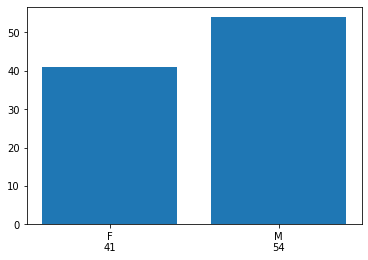

In [22]:
plot_bar('gender', IN_Data)

The gender seems pretty irrelevant if you consider the bar chart above.
The Males slightly dominate the funding but there is no major difference.

(56% Male and 44% Female)

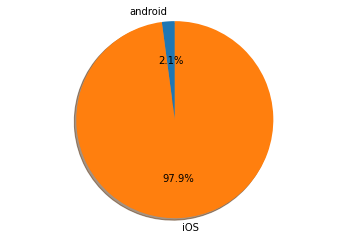

In [23]:
plot_pie('device', IN_Data)

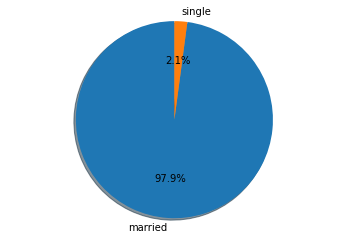

In [24]:
plot_pie('marital_status', IN_Data)

From the above two charts, we can see that married users and iOS users dominate the list of potential funders in Indiana.

These are so dominant that we can be sure that we need to consider married iOS users if we decide to find funders in Indiana.


In [25]:
IN_Data = IN_Data[(IN_Data['marital_status'] == 'married') & (IN_Data['device']=='iOS')]

Now we can explore the age distribution:

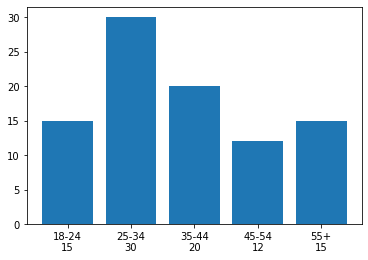

In [26]:
plot_bar('age', IN_Data)

We see that most of the people who are potential funders lie in the age groups - 25-34, and 35-44. So overall we can conclude the best age group is 25-44 (25-34 if we need a smaller group of people to reach out to)

## Conclusion for Indiana:

Thus we can conclude, if we decide to setup our project in Indiana, the best group of potential funders are:
* Age Group - 25-34 (Possibly 25-44 if a larger group is viable)
* Marital Status - Married
* Device - iOS
* Gender - Bias is negligable

## Exploring Oregon:

Let us plot out and see what is the best group to target in Oregon based on gender, age group, marital status and device 

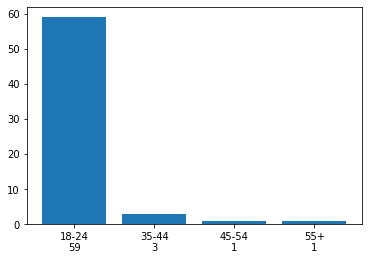

In [27]:
plot_bar('age', OR_Data)

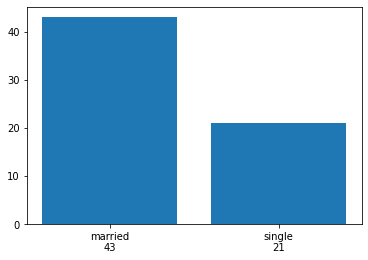

In [28]:
plot_bar("marital_status", OR_Data)

In [29]:
((OR_Data['marital_status']=='married')&(OR_Data['age']=="18-24")).sum()

41

Intersection of the married people with age=18-24 is 41

This is more than the number of all single people in Oregon. 

So we don't need to worry about whether or not the single people's intersection with age=18-24 will be better than that of married people.

*If n(AnB) > n(C) then n(AnB) > n(CnB)*

We can now reduce the dataset for further analysis

In [30]:
OR_Data = OR_Data[(OR_Data['marital_status'] == 'married') & (OR_Data['age']=='18-24')]

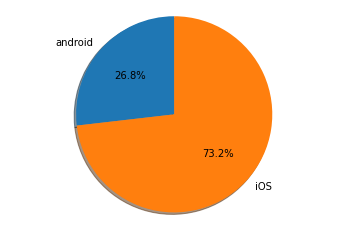

In [31]:
plot_pie("device", OR_Data)

We can see that the number of iOS users is predominantly greater than number of android users. So we can reduce our dataset even further. 

In [32]:
OR_Data = OR_Data[OR_Data['device']=='iOS']


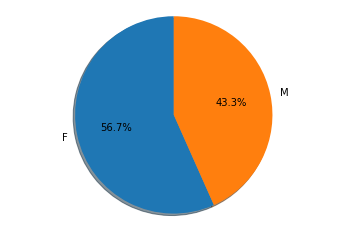

In [33]:
plot_pie("gender", OR_Data)

## Conclusion for Oregon:
Thus we can conclude, if we decide to setup our project in Oregon, the best group of potential funders are:
* Age Group - 18-24
* Marital Status - Married
* Device - iOS
* Gender - Bias is negligably towards Female

## Exploring Georgia:

Let us plot out and see what is the best group to target in Georgia based on gender, age group, marital status and device 

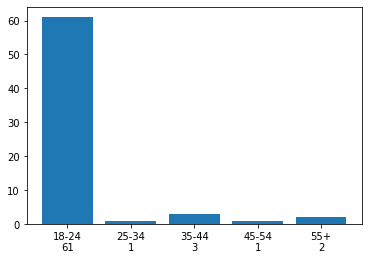

In [34]:
plot_bar('age', GA_Data)

We can see that age group 18-24 is highly dominant in Georgia. So we can safely reduce our dataset at this point

In [35]:
GA_Data = GA_Data[GA_Data['age']=='18-24']

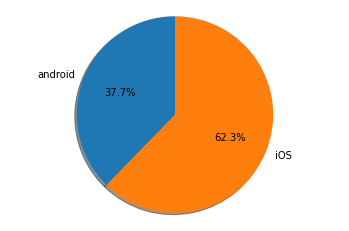

In [36]:
plot_pie('device', GA_Data)

We can see that iOS devices are used more in this community as well, so we can reduce the dataset here as well.

Since the figures we see above are after we have reduced the data by age group, we don't need to compare intersection of iOS with dataset to the intersection of android with dataset.

ie. *Number of iOS users in age 18-24 > Number of android users in age 18-24*

In [37]:
GA_Data = GA_Data[GA_Data['device']=='iOS']

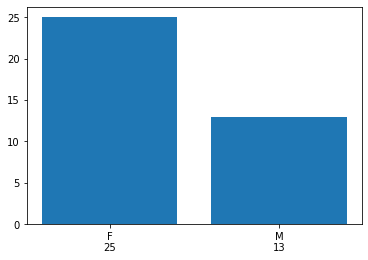

In [38]:
plot_bar('gender', GA_Data)

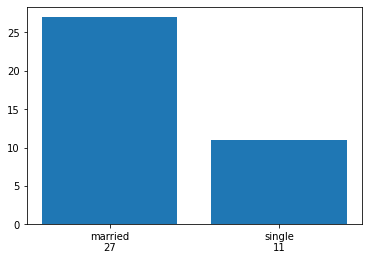

In [39]:
plot_bar('marital_status', GA_Data)

In [40]:
((GA_Data['marital_status']=='married')&(GA_Data['gender']=="F")).sum()

18

From the above bit of code and the plotted bar graphs, we can say that marital status of married and gender of female will be the best subset to choose.

We had a similar logical deduction in the Oregon data exploration.

*If n(AnB) > n(C) then n(AnB) > n(CnB)*

Number of females that are married = 18
As we can clearly see, 18 > number of single people > males

## Conclusion for Georgia:
Thus we can conclude, if we decide to setup our project in Georgia, the best group of potential funders are:
* Age Group - 18-24
* Marital Status - Married
* Device - iOS
* Gender - Female

# Final Conclusion:
We have thus performed data analysis, visualized the data and drawn relevant conclusions to answer the question - "what segments of users would be interested in the bicycle project"

## For Indiana:

Thus we can conclude, if we decide to setup our project in Indiana, the best group of potential funders are:
* Age Group - 25-34 (Possibly 25-44 if a larger group is viable)
* Marital Status - Married
* Device - iOS
* Gender - Bias is negligable

## For Oregon:
Thus we can conclude, if we decide to setup our project in Oregon, the best group of potential funders are:
* Age Group - 18-24
* Marital Status - Married
* Device - iOS
* Gender - Bias is negligably towards Female

## For Georgia:
Thus we can conclude, if we decide to setup our project in Georgia, the best group of potential funders are:
* Age Group - 18-24
* Marital Status - Married
* Device - iOS
* Gender - Female